In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

display(df.head())

X = df.drop('Class label', 1)
y = df['Class label']
#X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels:', np.unique(y))

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#Training data points: 124
#Testing data points: 54
Class labels: [1 2 3]


In [2]:
from sklearn.tree import DecisionTreeClassifier

# criterion : impurity function
# max_depth : maximum depth of tree
# random_state : seed of random number generator
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=3, 
                              random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [3]:
y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy (tree): %.2f' % ((y_test == y_pred).sum() / y_test.shape[0]))

# a more convenient way to evaluate a trained model is to use the sklearn.metrics 
from sklearn.metrics import accuracy_score
print('Accuracy (tree, sklearn): %.2f' % accuracy_score(y_test, y_pred))


Misclassified samples: 2
Accuracy (tree): 0.96
Accuracy (tree, sklearn): 0.96


In [4]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns.values)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [6]:
from sklearn.ensemble import RandomForestClassifier

# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy (forest): %.2f' % accuracy_score(y_test, y_pred))

Accuracy (forest): 0.98


 1) Flavanoids                     0.188736
 2) OD280/OD315 of diluted wines   0.162445
 3) Proline                        0.158390
 4) Color intensity                0.154620
 5) Alcohol                        0.102004
 6) Hue                            0.065470
 7) Total phenols                  0.049602
 8) Alcalinity of ash              0.030379
 9) Proanthocyanins                0.023283
10) Malic acid                     0.022439
11) Magnesium                      0.018800
12) Nonflavanoid phenols           0.012507
13) Ash                            0.011325


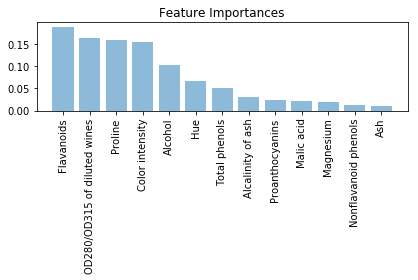

In [7]:
# inline plotting instead of popping out
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('./output/fig-forest-feature-importances.png', dpi=300)
plt.show()

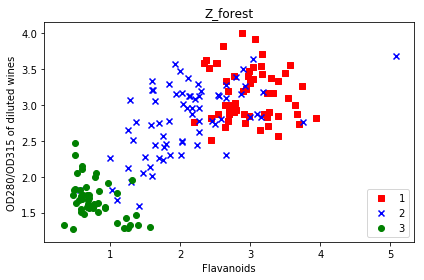

In [8]:
import matplotlib.pyplot as plt

Z_forest = X[['Flavanoids', 'OD280/OD315 of diluted wines']].values

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_forest[y.values==l, 0], 
                Z_forest[y.values==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_forest')
plt.xlabel('Flavanoids')
plt.ylabel('OD280/OD315 of diluted wines')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./output/fig-forest-z.png', dpi=300)
plt.show()

In [9]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.16)
# calls forest.fit()
sfm.fit(X_train, y_train)
Z_forest_alt = sfm.transform(X)

for f in range(Z_forest.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

 1) Flavanoids                     0.188736
 2) OD280/OD315 of diluted wines   0.162445


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# train a decision tree based on Z_forest

Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split( Z_forest, y, test_size=0.3, random_state=0)

tree_forest = DecisionTreeClassifier(criterion='entropy', 
                                     max_depth=3, 
                                     random_state=0)
tree_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = tree_forest.predict(Z_forest_test)
print('Accuracy (tree_forest): %.2f' % accuracy_score(y_forest_test, y_forest_pred))

# train a decision tree based on Z_pca

# load Z_pca that we have created in our last lab
Z_pca= pd.read_csv('Z_pca.csv')
# random_state should be the same as that used to split the Z_forest
Z_pca_train, Z_pca_test, y_pca_train, y_pca_test = train_test_split( Z_pca, y, test_size=0.3, random_state=0)

tree_pca = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=3, 
                                  random_state=0)
tree_pca.fit(Z_pca_train, y_pca_train)

y_pca_pred = tree_pca.predict(Z_pca_test)
print('Accuracy (tree_pca): %.2f' % accuracy_score(y_pca_test, y_pca_pred))

Accuracy (tree_forest): 0.83
Accuracy (tree_pca): 0.96


In [13]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# train a random forest based on Z_forest

forest_forest = RandomForestClassifier(criterion='entropy',
                                       n_estimators=200, 
                                       random_state=1,
                                       n_jobs=2)
forest_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = forest_forest.predict(Z_forest_test)
print('Accuracy (forest_forest): %.2f' % accuracy_score(y_forest_test, y_forest_pred))


# train a random forest based on Z_pca

forest_pca = RandomForestClassifier(criterion='entropy',
                                    n_estimators=200, 
                                    random_state=1,
                                    n_jobs=2)
forest_pca.fit(Z_pca_train, y_pca_train)

y_pca_pred = forest_pca.predict(Z_pca_test)
print('Accuracy (forest_pca): %.2f' % accuracy_score(y_pca_test, y_pca_pred))

Accuracy (forest_forest): 0.67
Accuracy (forest_pca): 0.98


In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')


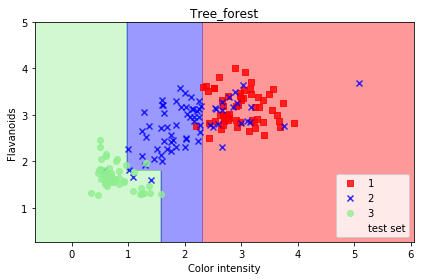

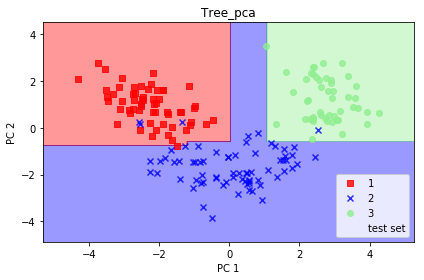

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# plot boundaries of tree_forest

Z_forest_combined = np.vstack((Z_forest_train, Z_forest_test))
y_forest_combined = np.hstack((y_forest_train, y_forest_test))
plot_decision_regions(Z_forest_combined, 
                      y_forest_combined, 
                      classifier=tree_forest, 
                      test_idx=range(y_forest_train.shape[0],
                                     y_forest_train.shape[0] + y_forest_test.shape[0]))

plt.title('Tree_forest')
plt.xlabel('Color intensity')
plt.ylabel('Flavanoids')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./output/fig-boundary-tree-forest.png', dpi=300)
plt.show()

# plot boundaries of tree_pca

Z_pca_combined = np.vstack((Z_pca_train, Z_pca_test))
y_pca_combined = np.hstack((y_pca_train, y_pca_test))
plot_decision_regions(Z_pca_combined, 
                      y_pca_combined, 
                      classifier=tree_pca, 
                      test_idx=range(y_pca_train.shape[0],
                                     y_pca_train.shape[0] + y_pca_test.shape[0]))

plt.title('Tree_pca')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./output/fig-boundary-tree-pca.png', dpi=300)
plt.show()


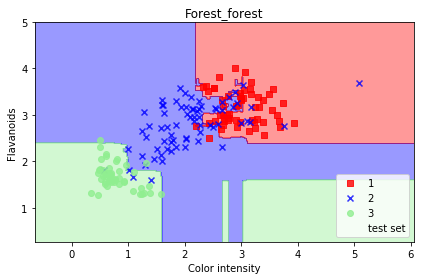

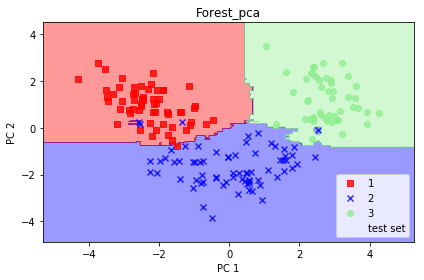

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# plot boundaries of tree_forest

plot_decision_regions(Z_forest_combined, 
                      y_forest_combined, 
                      classifier=forest_forest, 
                      test_idx=range(y_forest_train.shape[0],
                                     y_forest_train.shape[0] + y_forest_test.shape[0]))

plt.title('Forest_forest')
plt.xlabel('Color intensity')
plt.ylabel('Flavanoids')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./output/fig-boundary-forest-forest.png', dpi=300)
plt.show()

# plot boundaries of tree_pca

plot_decision_regions(Z_pca_combined, 
                      y_pca_combined, 
                      classifier=forest_pca, 
                      test_idx=range(y_pca_train.shape[0],
                                     y_pca_train.shape[0] + y_pca_test.shape[0]))

plt.title('Forest_pca')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./output/fig-boundary-forest-pca.png', dpi=300)
plt.show()